# Distributions

Interesting sources: 
- https://www.edx.org/course/probability-the-science-of-uncertainty-and-data

In [2]:
import numpy as np
import pandas as pd

# Uniform distribution

## Rolling a 6-sided die

<img src="https://wherethewindsblow.com/wp-content/uploads/2015/07/JUMBO-Six-sided-white-dice.jpg" style="width: 300px;"/>

In [52]:
minValue = 1
maxValue = 6
numberOfSamples = 6 # Increase number to show that it converges to a uniform distribution

In [53]:
results = pd.Series( np.random.randint(low=minValue, high=maxValue + 1, size=numberOfSamples) )

In [54]:
results

0    5
1    6
2    1
3    1
4    6
5    4
dtype: int32

<AxesSubplot:>

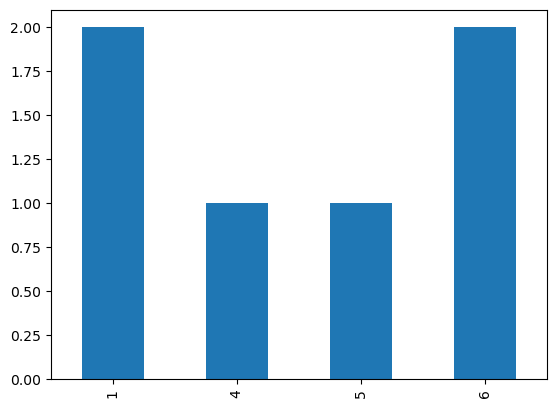

In [55]:
results.value_counts().sort_index().plot(kind='bar')

## Normal distribution

### Sampling from the average length a full-grown citizen in the Netherlands.

In [88]:
averageLength = 174.25
stdLength = 8
numberOfPeopleToSample = 300 #3 # Play with these values to show the impact on the histogram

In [89]:
randomLengths = pd.Series( np.random.normal(averageLength, stdLength, numberOfPeopleToSample) )

In [90]:
randomLengths

0      166.393773
1      171.661613
2      168.781252
3      178.765852
4      180.825913
          ...    
295    175.599872
296    184.061357
297    176.291871
298    171.289097
299    168.140897
Length: 300, dtype: float64

<AxesSubplot:ylabel='Frequency'>

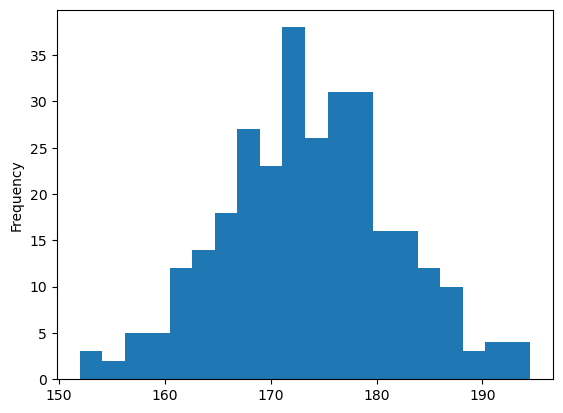

In [91]:
    randomLengths.plot(kind='hist', bins=20)

![](https://upload.wikimedia.org/wikipedia/commons/8/8c/Standard_deviation_diagram.svg 'Normal distribution')

### Examples of normal distribution in real life
- https://studiousguy.com/real-life-examples-normal-distribution/
- https://galtonboard.com/probabilityexamplesinlife

### Central limit theorem

In [92]:
sampleMeans = []
sampleSize = 100
sampleMeansSize = 10 # 10000

for i in range(sampleMeansSize):
    randomLengths = pd.Series( np.random.normal(averageLength, stdLength, sampleSize) )
    sampleMeans.append(randomLengths.mean())

In [28]:
sampleMeans

[175.67689459825345,
 175.5583356973606,
 173.38235213821577,
 174.22904779844984,
 173.12526307507892,
 175.24085265416647,
 173.87710261801124,
 174.15918315446734,
 174.9999836332492,
 175.40816549845619]

<AxesSubplot:ylabel='Frequency'>

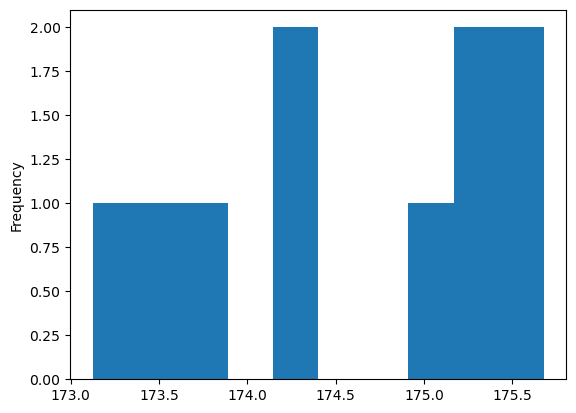

In [30]:
pd.Series(sampleMeans).plot(kind='hist', bins = 10)

In [31]:
sampleMeans = []
sampleSize = 100
sampleMeansSize = 10000

for i in range(sampleMeansSize):
    randomRolls = pd.Series( np.random.randint(low=minValue, high=maxValue + 1, size=sampleSize) )
    sampleMeans.append(randomRolls.mean())

<AxesSubplot:ylabel='Frequency'>

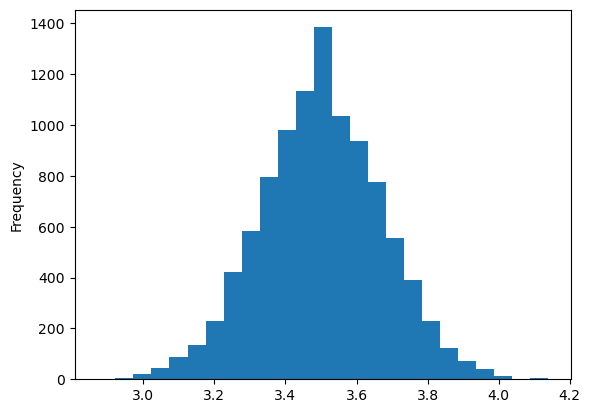

In [15]:
pd.Series(sampleMeans).plot(kind='hist', bins = 25)

### Confidence interval

![](https://getcalc.com/formula/statistics/mean-confidence-interval-infinite-population.png)

So let's reconsider one sample. Based on this one sample, what can we say about the mean of the underlying population?

In [16]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(randomLengths)-1, loc=randomLengths.mean(), scale=st.sem(randomLengths))

(172.0941191061525, 175.65836029992397)

In [17]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(randomRolls)-1, loc=randomRolls.mean(), scale=st.sem(randomRolls))

(3.2003282047111323, 3.8396717952888677)

Let's apply this to the iris dataset. What is the 95% confidence interval of the sepal_length? Meaning, let's calculate the interval that contains the real mean sepal length with 95% confidence.

In [18]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(iris)-1, loc=iris['sepal_length'].mean(), scale=st.sem(iris['sepal_length']))

(5.709732481507367, 5.976934185159302)

### Portfolio assignment 7
15 min: Look at the histogram of at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Do you recognise the distribution? Does it look like a uniform or normal distribution or something else? If it doesn't look like a uniform or normal distribution, take a quick look here to see if you can find the distribution shape: https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm

![](https://i.imgur.com/0v1CGNV.png)

### Portfolio assignment 8
15 min: 
- Calculate the 90%, 95%, 99% and 99.99% confidence interval for at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Do you see the impact the confidence has on the interval?
- Now calculate the 95% confidence interval again but use only the first 10% of your rows. Compare this interval to the previous 95% confidence interval you calculated. Do you see the impact of having less data?

![](https://i.imgur.com/0v1CGNV.png)